In [132]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from support import *

In [133]:
import pandas as pd
import numpy as np

loc = "/content/drive/My Drive/parserr/d.txt"

banknote = pd.read_csv(loc,names=['f1','f2','f3','f4','y'])
banknote.head()

,f1,f2,f3,f4,y
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [134]:
#Q1.feature_means(banknote)
def feature_means(d):
  dl = [i for i in d.iloc[:,:4].mean()]
  return dl

means = feature_means(banknote)
means

[0.4337352570699707,
 1.9223531206393603,
 1.3976271172667651,
 -1.191656520043731]

In [135]:
#Q1.covariance_matrix
def covariance_matrix(banknote):
  cov =banknote.iloc[:,:4].cov()
  return cov

var = covariance_matrix(banknote)
var

,f1,f2,f3,f4
f1,8.081299,4.405083,-4.666323,1.653338
f2,4.405083,34.445710,-19.905119,-6.490033
f3,-4.666323,-19.905119,18.576359,2.887241
f4,1.653338,-6.490033,2.887241,4.414256


In [136]:
#Q1.feature_means_class_1(banknote)
def feature_means_class_1(banknote):
  nd = banknote.loc[banknote['y']==1]
  class1 = [i for i in nd.iloc[:,:4].mean()]
  return class1

feature_means_class_1(banknote)

[-1.868442562786883,
 -0.9935761245901634,
 2.1482710088524617,
 -1.2466407459016389]

In [137]:
#Q1.covariance_matrix_class_1
def covariance_matrix_class_1(banknote):
  ndcov = banknote.loc[banknote['y']==1]
  class1cov = ndcov.iloc[:,:4].cov()
  return class1cov

covVar =covariance_matrix_class_1(banknote)
covVar

,f1,f2,f3,f4
f1,3.538848,0.749234,-4.690537,1.262439
f2,0.749234,29.212768,-25.244698,-5.696759
f3,-4.690537,-25.244698,27.686654,3.007787
f4,1.262439,-5.696759,3.007787,4.288974


In [138]:
from sklearn.neighbors import KernelDensity
from sklearn.metrics import mean_squared_error

#Question. Implement Parzen with hard window parameter h.
class HardParzen:
  def __init__(self,h):
    self.h = h
    self.mod = KernelDensity(kernel='linear', metric='euclidean',bandwidth=self.h)
    self.pred = []

  def train(self,x,y):
    print('training...')
    self.mod.fit(x,y)

  def compute_predictions(self,xtest):
    yh = self.mod.score_samples(xtest)
    for i in yh:
      if i < -10:
        self.pred.append(0)
      else:
        self.pred.append(1)
    
    
    return self.pred


    
#h = HardParzen(2)
#h.train(tx,ty)
#h.compute_predictions(vx)

In [139]:
#Question. Implement Parzen with a soft window.
class SoftParzen:
  def __init__(self,h):
    self.h = h
    self.mod = KernelDensity(kernel='gaussian', metric='euclidean',bandwidth=self.h)

  def train(self,x,y):
    print('training...')
    self.mod.fit(x,y)

  def compute_predictions(self,xtest):
    yh = self.mod.score_samples(xtest)
    op =[]
    for i in yh:
      if i < -3:
        op.append(0)
      else:
        op.append(1)
    return op


In [140]:
#Question. Implement a function split_dataset that splits the banknote dataset
def split_dataset(da):
  count = 0
  train = []
  val = []
  test = []
  for i,j in enumerate(da):
    if i%5 == 0 or i%5 == 1 or i%5 ==2 :
      train.append(j)
      count+=1

  print('train count :', count)
  
  count=0
  for i,j in enumerate(da):
    if i%5 == 3:
      val.append(j)
      count+=1

  print('val count :',count)

  count=0
  for i,j in enumerate(da):
    if i%5 == 4:
      test.append(j)
      count+=1 
  
  print('test count :',count)

  trainx = np.array(train)[:,:4]
  trainy = np.array(train)[:,4:]
  valx = np.array(val)[:,:4]
  valy = np.array(val)[:,4:]

  print('trainx ', trainx.shape)
  print('trainy ', trainy.shape)
  print('valx ', valx.shape)
  print('valy ', valy.shape)
  print('test ', np.array(test).shape)
  return trainx,trainy,valx,valy,test



bnk = np.genfromtxt( loc ,delimiter = ',')

tx,ty,vx,vy,test = split_dataset(bnk)

train count : 824
val count : 274
test count : 274
trainx  (824, 4)
trainy  (824, 1)
valx  (274, 4)
valy  (274, 1)
test  (274, 5)


In [141]:
#Question. Implement two functions ErrorRate.hard_parzen and ErrorRate.soft_parzen
class ErrorRate:
  def __init__(self,x_train,y_train,x_val,y_val):
    self.x_train = x_train
    self.y_train = y_train
    self.x_val = x_val
    self.y_val = y_val


  def soft_parzen(self,h):
    sp = SoftParzen(h)
    sp.train(self.x_train,self.y_train)
    pred = sp.compute_predictions(self.x_val)
    err =  mean_squared_error(pred,self.y_val)
    return err

  def hard_parzen(self,h):
    hp = HardParzen(h)
    hp.train(self.x_train,self.y_train)
    pred = hp.compute_predictions(self.x_val)
    err =  mean_squared_error(pred,self.y_val)
    return err
    


In [142]:
# HardParzen  h ∈ {0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 3.0, 10.0, 20.0}
# SoftParzen  h ∈ {0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 3.0, 10.0, 20.0}
hList = [ 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 3.0, 10.0, 20.0]

import matplotlib.pyplot as plt
def main(tx,ty,vx,vy):
  parzan =ErrorRate(tx,ty,vx,vy)

  HardParzen_Error = []
  SoftParzen_Error = []

  for h in hList:
    error = parzan.hard_parzen(h)
    HardParzen_Error.append(error)

  for i in hList:
    error = parzan.soft_parzen(i)
    SoftParzen_Error.append(error)

  ax = plt.subplot(1,1,1)
  p1, = ax.plot(hList,HardParzen_Error, label="HardParzen’s classification error")
  p2, = ax.plot(hList,SoftParzen_Error,  label="RBF Parzen’s classification error")
  plt.scatter(hList,HardParzen_Error)
  plt.scatter(hList,SoftParzen_Error)
  #plt.xlim(0,20)
  plt.title('error rates hard vs soft')
  plt.ylabel('error rates')
  plt.xlabel('argv')
  ax.legend()
  plt.show()


training...
training...
training...
training...
training...
training...
training...
training...
training...
training...
training...
training...
training...
training...
training...
training...
training...
training...
training...
training...


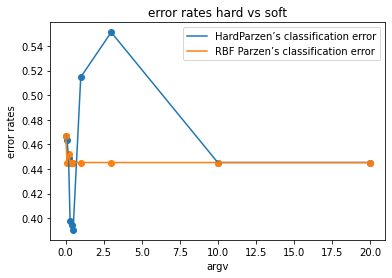

In [143]:
main(tx,ty,vx,vy)

In [144]:
#Question. Implement a function get_test_errors 
x_test,y_test = np.array(test)[:,:4],np.array(test)[:,4:]

#Optimal h is 0.1 for both hard and soft parzan from figure above.
def get_test_errors(xtrain,ytrain,xtest,ytest,h=0.1):
  parzan =ErrorRate(xtrain,ytrain,xtest,ytest)
  err_soft = parzan.soft_parzen(h)
  err_hard = parzan.hard_parzen(h)
  
  output = [err_soft,err_hard]
  return output


get_test_errors(tx,ty,x_test,y_test)

training...
training...


[0.4562043795620438, 0.4708029197080292]

In [145]:
#Question. Similar to Question 5, compute the validation errors of Hard Parzen classifiers
#trained on 500 random projections of the training set
from sklearn import random_projection

np.random.shuffle(bnk)
ran = bnk[:500,:4]
ran_target = bnk[:500,4:]
ran.shape,ran_target.shape


((500, 4), (500, 1))

/usr/local/lib/python3.6/dist-packages/sklearn/random_projection.py:390: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (4 < 8).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)


training...
training...
training...
training...
training...
training...
training...
training...
training...
training...
training...
training...
training...
training...
training...
training...
training...
training...
training...
training...


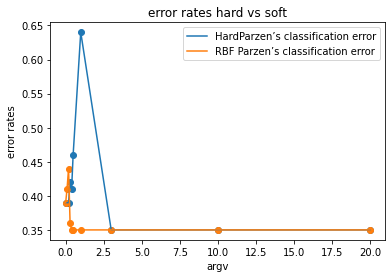

In [151]:
t = random_projection.GaussianRandomProjection(n_components=8)
features = t.fit_transform(ran)

tx =features[:400]
vx =features[400:]
ty =ran_target[:400]
vy =ran_target[400:]

features.shape,tx.shape,vx.shape,ty.shape,vy.shape

main(tx,ty,vx,vy)

Disscussion 

The complexity of both hard and soft is O(m **3 ). where m is no. of features.  Also there is not much difference in complexity if h is changed as the time taken is mostly dependent on the sample size.

In the two graphs  the only difference we see is that the optimal value of h shifts from near zero to 4.